
# Binary text classification on IMDB dataset using a Multi-Layer Perceptron (MLP) model with TensorFlow/Keras.

dataset: https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras import layers

## 1- Data preparation

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0]

np.int64(1)

### Vectorizing Text Sequences for Neural Network Input

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
train_labels.dtype

dtype('int64')

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_train.dtype

dtype('float32')

## 2- Model Design

In [ ]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

## 3- Training

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6608 - loss: 0.6404 - val_accuracy: 0.8550 - val_loss: 0.4413
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8886 - loss: 0.3667 - val_accuracy: 0.8840 - val_loss: 0.3117
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9236 - loss: 0.2352 - val_accuracy: 0.8935 - val_loss: 0.2771
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9474 - loss: 0.1687 - val_accuracy: 0.8883 - val_loss: 0.2776
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9631 - loss: 0.1286 - val_accuracy: 0.8870 - val_loss: 0.2875
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9752 - loss: 0.1003 - val_accuracy: 0.8860 - val_loss: 0.3031
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9841 - loss: 0.0776 - val_accuracy: 0.8816 - val_loss: 0.3281
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9887 - loss: 0.0622 - val_accuracy: 0.8796 - v

## 4- Evaluation

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

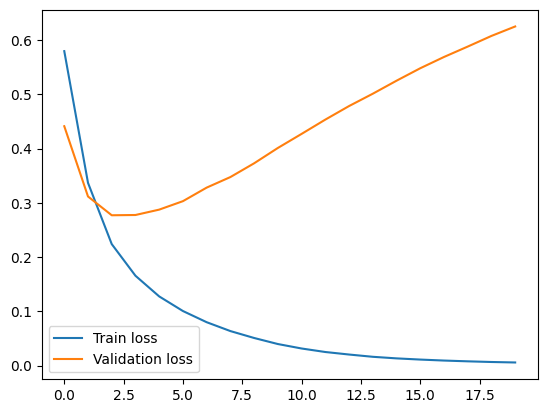

In [ ]:
import matplotlib.pyplot as plt

losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, label='Train loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

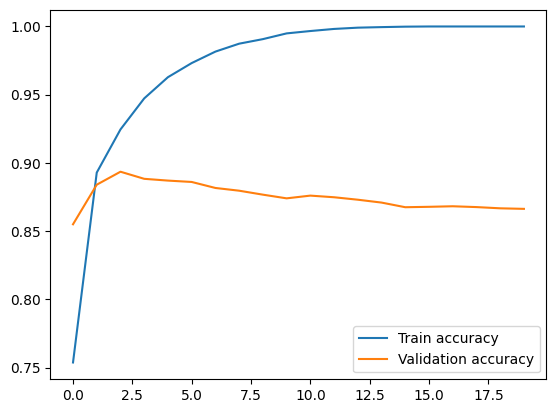

In [ ]:
accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

plt.plot(accuracies, label='Train accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8521 - loss: 0.6916


[0.6790180206298828, 0.8545600175857544]

In [ ]:
preds = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
preds

array([[0.00864613],
       [1.        ],
       [0.92182124],
       ...,
       [0.00300236],
       [0.01070655],
       [0.9125252 ]], dtype=float32)

In [ ]:
preds[preds<0.5] = 0
preds[preds>=0.5] = 1
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86     12500
    Positive       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

